In [1]:
#!pip install scikit-learn
#!pip install seaborn

# Importación de librerías

In [2]:
from sklearn import datasets

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import pickle

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import export_graphviz
from sklearn.linear_model import LinearRegression
from datetime import date, time, datetime, timedelta
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans
import plotly.express as px

# Objetivo

Objetivo: Comparar la eficacia de los algoritmos de regresión, árboles de decisión y Clustering en la predicción de los salarios del sector tech (de la india), en función de los años de experiencia, la titulación, el tipo de trabajo y brecha salarial entre géneros.

1. Regresión: nos ayudaría a predecir como aumenta el salario en función de los años de experiencia de la persona.

2. Árboles de decisión: podríamos utilizar un árbol de decisión para predecir el salario en función de varias variables.

3. Clustering: podríamos utilizar el clustering para identificar los diferentes tipos de trabajadoes

La razón de elegir estos dos algoritmos es que la regresión es adecuada cuando se desea predecir variables y se busca interpretabilidad.  
Por otro lado, los árboles de decisión son útiles para capturar relaciones no lineales, facilitar la interpretación y manejar diferentes tipos de características.

Al comparar estos tres enfoques, puedes evaluar cómo se desempeñan en términos de precisión, capacidad de generalización y facilidad de interpretación.  
Esto nos ayudará a determinar cuál de los algoritmos es más adecuado para nuestro problema.

# Carga de datos

In [3]:
df_salary = pd.read_csv('Salary_Data.csv')

In [4]:
# Verificamos las primeras filas del dataframe
df_salary.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [5]:
# Obtenemos la información del dataframe
df_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [6]:
# Resumen estadístico descriptivas de las variables numéricas. Este resumen estadístico nos da una visión general de la distribución de los datos
df_salary.describe()

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


# Exploración y limpieza de datos

In [7]:
# Conteo de valores únicos en cada columna, podemos ver la cantidad de categorías distintas en cada columna
print(df_salary.nunique())

Age                     41
Gender                   3
Education Level          7
Job Title              193
Years of Experience     37
Salary                 444
dtype: int64


In [8]:
#Mostramos las columnas que tienen valores nulos
sumanulos = df_salary.isna().sum()
valoresnulos = sumanulos[sumanulos!=0]
valoresnulos

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

Vemos que la cantidad es mínima, por ellos vamos a eliminar las filas con los valores nulos

In [9]:
df_salary.dropna(inplace=True)

In [10]:
# Verificamos nuevamente el df y vemos que ya no tenemos nulos y hay una cantidad homogénea de datos por columna.
df_salary.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6698 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6698 non-null   float64
 1   Gender               6698 non-null   object 
 2   Education Level      6698 non-null   object 
 3   Job Title            6698 non-null   object 
 4   Years of Experience  6698 non-null   float64
 5   Salary               6698 non-null   float64
dtypes: float64(3), object(3)
memory usage: 366.3+ KB


Vamos a  redondear los valores de la columna 'Age' y 'Years of Experience' para luego cambiarlo a un tipo de dato entero, así buscamos la compatibilidad para un futuro análisis.

In [11]:
df_salary['Age'] = round(df_salary['Age'])
df_salary['Age'] = df_salary['Age'].astype(int)

In [12]:
df_salary['Years of Experience'] = round(df_salary['Years of Experience'])
df_salary['Years of Experience'] = df_salary['Years of Experience'].astype(int)

Estamos renombrando las columnas que tienen espacio y lo cambiamos por "_" , esto nos facilita el análisis y evita errores.

In [13]:
df_salary = df_salary.rename(columns={'Job Title': 'Job_Title', 'Years of Experience': 'Years_of_Experience', 'Education Level': 'Education_Level'})

In [14]:
# Damos una vista previa de las primeras filas de nuestro df, por defecto son las cinco primeras.
df_salary.head()

,Age,Gender,Education_Level,Job_Title,Years_of_Experience,Salary
0,32,Male,Bachelor's,Software Engineer,5,90000.0
1,28,Female,Master's,Data Analyst,3,65000.0
2,45,Male,PhD,Senior Manager,15,150000.0
3,36,Female,Bachelor's,Sales Associate,7,60000.0
4,52,Male,Master's,Director,20,200000.0


Comprobación de atípicos

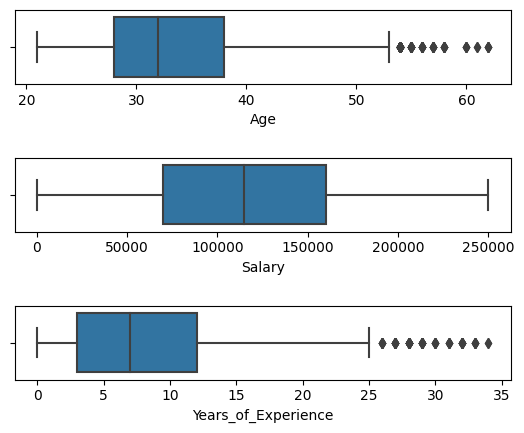

In [15]:
fig, ax = plt.subplots(nrows=3, ncols=1)
fig.subplots_adjust(hspace=1)

for i, col in enumerate(['Age','Salary','Years_of_Experience']):
    sns.boxplot(x=col, data=df_salary, ax=ax[i])

Corregimos atípicos en edad y años de experiencia

In [16]:
# Lista atípicos
listaatipicos = ['Age','Years_of_Experience']

#Creamos un bucle para recorrer la lista y corregir atípicos
for j in range (len(listaatipicos)):

#Con esta variable creamos un df solo con los los valores del atípico
        df_atipicos = df_salary[[listaatipicos[j]]]

#Calculamos los cuartiles
        qs = df_atipicos.quantile([.25, .5, .75], numeric_only=True).values
        q1 = qs[0][0]
        q2 = qs[1][0]
        q3 = qs[2][0]

# Definimos los límites inferior y superior, a partir de los cuales los datos serían considerados como atípicos
        iqr = q3-q1
        iqr_lim_inf = round(q1 - 1.5*iqr)
        iqr_lim_sup = round(q3 + 1.5*iqr)

#Aquí le indicamos que cuando encuentre un valor superior al límite que hemos definido,que nos lo reemplace por el valor asignado al límite superior y viceversa
        df_salary[listaatipicos[j]] = df_salary[listaatipicos[j]].apply(
        lambda x: iqr_lim_sup if x > iqr_lim_sup else (iqr_lim_inf if x < iqr_lim_inf else x))

Vamos a crear tres gráficos de conteo, uno para cada una de las columnas específicadas.

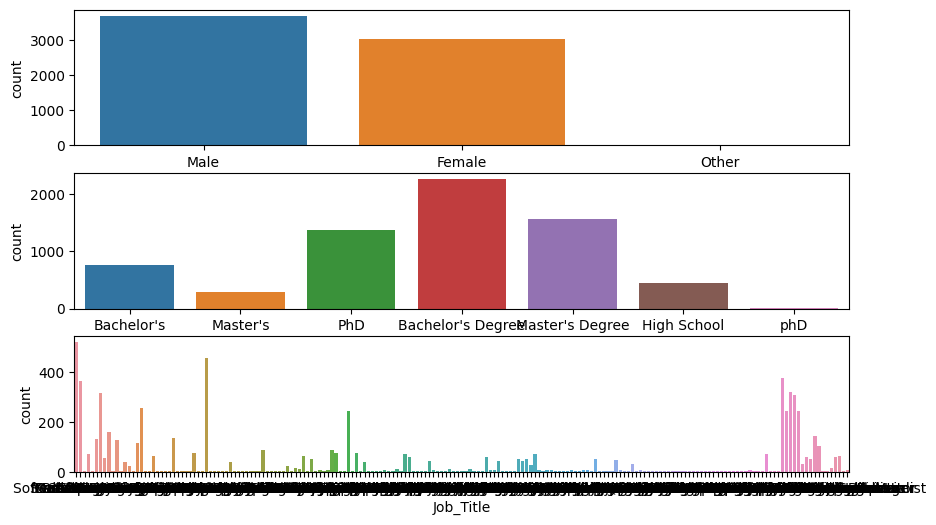

In [17]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,6))

for i, col in enumerate(['Gender', 'Education_Level', 'Job_Title']):
  sns.countplot(x=col, data=df_salary, ax=ax[i])
  ax[i].set_xticklabels(ax[i].get_xticklabels())

En el cuadro de "job_title" Salen muchas profesiones, vamos a ver cuántas hay y cómo podemos eliminarlas

In [18]:
df_salary.Job_Title.unique()

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

Ahora vamos a ver los valores que tiene cada profesión, para poder decidir

In [19]:
df_salary.Job_Title.value_counts()

Job_Title
Software Engineer             518
Data Scientist                453
Software Engineer Manager     376
Data Analyst                  363
Senior Project Engineer       318
                             ... 
Account Manager                 1
Help Desk Analyst               1
Senior Training Specialist      1
Junior Web Designer             1
Software Project Manager        1
Name: count, Length: 191, dtype: int64

Vamos a eliminar aquellas profesiones que tengan valores menores de 100 porque no creemos que aporten demasiado al modelo

In [20]:
job_title = df_salary.Job_Title.value_counts()
job_title2 = job_title[job_title < 100]
job_title2

Job_Title
Director of Marketing         88
Web Developer                 87
Research Director             75
Product Designer              75
Content Marketing Manager     73
                              ..
Account Manager                1
Help Desk Analyst              1
Senior Training Specialist     1
Junior Web Designer            1
Software Project Manager       1
Name: count, Length: 173, dtype: int64

In [21]:
listaborrar = list(job_title2.index)
for i in range (len(listaborrar)):
    df_salary = df_salary[df_salary['Job_Title'] != listaborrar[i]]

In [22]:
df_salary.head()

,Age,Gender,Education_Level,Job_Title,Years_of_Experience,Salary
0,32,Male,Bachelor's,Software Engineer,5,90000.0
1,28,Female,Master's,Data Analyst,3,65000.0
5,29,Male,Bachelor's,Marketing Analyst,2,55000.0
6,42,Female,Master's,Product Manager,12,120000.0
8,26,Female,Bachelor's,Marketing Coordinator,1,45000.0


Corregimos también la columna de "education_level" y la agrupamos para un mejor análisis

In [23]:
df_salary.Education_Level.unique()

array(["Bachelor's", "Master's", 'PhD', "Bachelor's Degree",
       "Master's Degree", 'High School', 'phD'], dtype=object)

In [24]:
def education_correction(x):
    if x == "Bachelor's Degree":
        return "Bachelor's"
    elif x == "Master's Degree":
        return "Master's"
    elif x == 'PhD':
        return 'phD'
    else:
        return x
df_salary['Education_Level']=df_salary['Education_Level'].apply(education_correction)

Veamos nuevamente los gráficos de conteo, para ver como ha cambiado despues de los ajustes. Vemos que ahora es mucho mas digerible y ordenado.

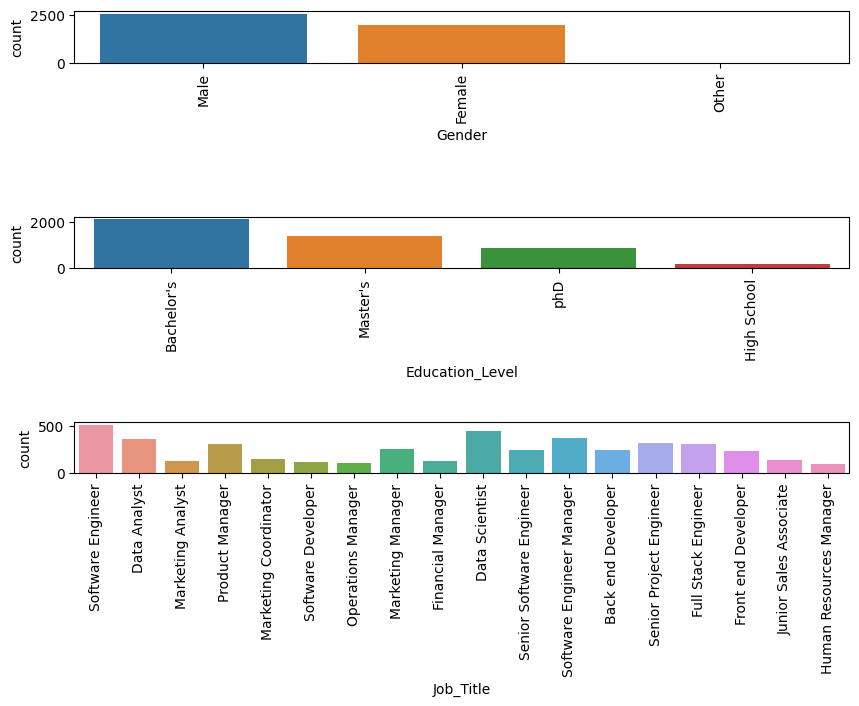

In [25]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,6))
fig.subplots_adjust(hspace=3)

for i, col in enumerate(['Gender', 'Education_Level', 'Job_Title']):
  sns.countplot(x=col, data=df_salary, ax=ax[i])
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=90)

# Preprocesamiento de datos

In [26]:
df_salary.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4542 entries, 0 to 6702
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  4542 non-null   int64  
 1   Gender               4542 non-null   object 
 2   Education_Level      4542 non-null   object 
 3   Job_Title            4542 non-null   object 
 4   Years_of_Experience  4542 non-null   int64  
 5   Salary               4542 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 248.4+ KB


Pasamos Gender, Education_Level y Job_Title a variabes categóricas

In [27]:
print(' Los géneros: ', end="")
job_level = list(df_salary.Gender.unique())
for i in range(len(job_level)):
    print(job_level[i], end=",")
df_salary["Gender"] = df_salary["Gender"].astype('category').cat.codes
print('\n Pasan a llamarse: ', end="")
job_level = list(df_salary.Gender.unique())
for i in range(len(job_level)):
    print(job_level[i], end=",")

 Los géneros: Male,Female,Other,
 Pasan a llamarse: 1,0,2,

In [28]:
print(' Los niveles de educacion: ', end="")
job_level = list(df_salary.Education_Level.unique())
for i in range(len(job_level)):
    print(job_level[i], end=",")

def education_correction(x):
    if x == "Bachelor's":
        return 1
    elif x == "Master's":
        return 2
    elif x == 'phD':
        return 3
    else:
        return 0
df_salary['Education_Level']=df_salary['Education_Level'].apply(education_correction)


print('\n Pasan a llamarse: ', end="")
job_level = list(df_salary.Education_Level.unique())
for i in range(len(job_level)):
    print(job_level[i], end=",")

 Los niveles de educacion: Bachelor's,Master's,phD,High School,
 Pasan a llamarse: 1,2,3,0,

In [29]:
print(' Los géneros: ', end="")
job_level = list(df_salary.Job_Title.unique())
for i in range(len(job_level)):
    print(job_level[i], end=",")
df_salary["Job_Title"] = df_salary["Job_Title"].astype('category').cat.codes
print('\n Pasan a llamarse: ', end="")
job_level = list(df_salary.Job_Title.unique())
for i in range(len(job_level)):
    print(job_level[i], end=",")

 Los géneros: Software Engineer,Data Analyst,Marketing Analyst,Product Manager,Marketing Coordinator,Software Developer,Operations Manager,Marketing Manager,Financial Manager,Data Scientist,Senior Software Engineer,Software Engineer Manager,Back end Developer,Senior Project Engineer,Full Stack Engineer,Front end Developer,Junior Sales Associate,Human Resources Manager,
 Pasan a llamarse: 16,1,8,12,9,15,11,10,3,2,14,17,0,13,5,4,7,6,

In [30]:
df_salary.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4542 entries, 0 to 6702
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  4542 non-null   int64  
 1   Gender               4542 non-null   int8   
 2   Education_Level      4542 non-null   int64  
 3   Job_Title            4542 non-null   int8   
 4   Years_of_Experience  4542 non-null   int64  
 5   Salary               4542 non-null   float64
dtypes: float64(1), int64(3), int8(2)
memory usage: 186.3 KB


# MODELO DE REGRESIÓN

## Estudio del conjunto de datos

In [31]:
corr = df_salary.corr()
corr

,Age,Gender,Education_Level,Job_Title,Years_of_Experience,Salary
Age,1.000000,0.140344,0.595318,0.230264,0.944147,0.714632
Gender,0.140344,1.000000,0.000420,0.080926,0.115929,0.102250
Education_Level,0.595318,0.000420,1.000000,0.072884,0.566691,0.588323
Job_Title,0.230264,0.080926,0.072884,1.000000,0.182468,0.107738
Years_of_Experience,0.944147,0.115929,0.566691,0.182468,1.000000,0.777988
Salary,0.714632,0.102250,0.588323,0.107738,0.777988,1.000000


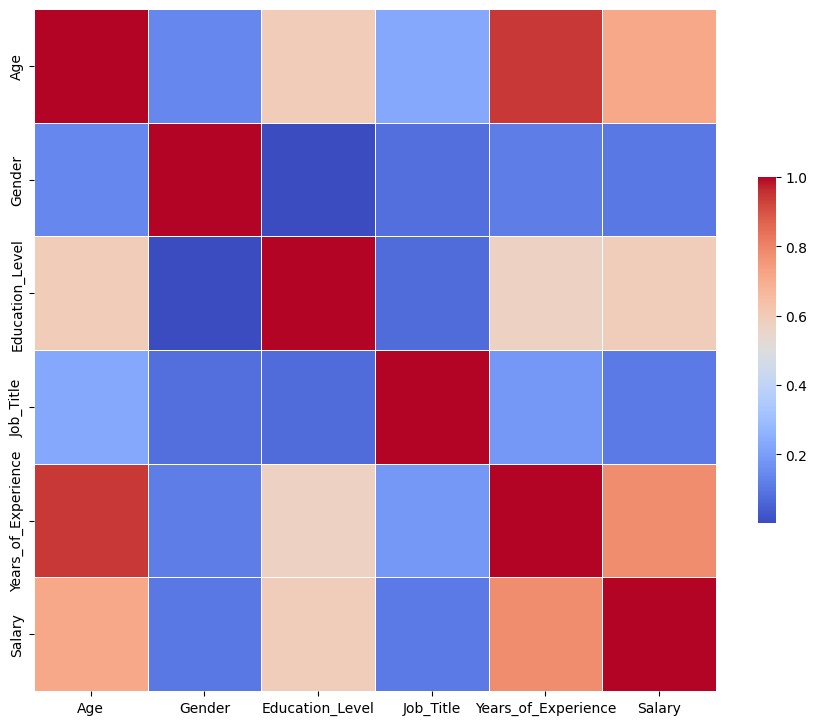

In [32]:
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, cmap='coolwarm', square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

## Regresión lineal simple

Según la paleta de colores elegida nos interesan, para predecir "Salary":
- Las rojas más intensas, que tienen una relación directa
- Las azules más intensas, las cuales tienen una relación indirecta

Vamos a probar con los años de experiencia que es la que tiene un color más parecido al rojo intenso

### Selección de datos

In [33]:
#Seleccionamos la variable predictora
X = df_salary[['Years_of_Experience']]
#Seleccionamos la variable predicha
y = df_salary['Salary']

In [34]:
X

,Years_of_Experience
0,5
1,3
5,2
6,12
8,1
...,...
6682,4
6690,13
6691,9
6701,4


In [35]:
y

0        90000.0
1        65000.0
5        55000.0
6       120000.0
8        45000.0
          ...   
6682     55000.0
6690    130000.0
6691     95000.0
6701     55000.0
6702    140000.0
Name: Salary, Length: 4542, dtype: float64

### Visualización del conjunto de datos

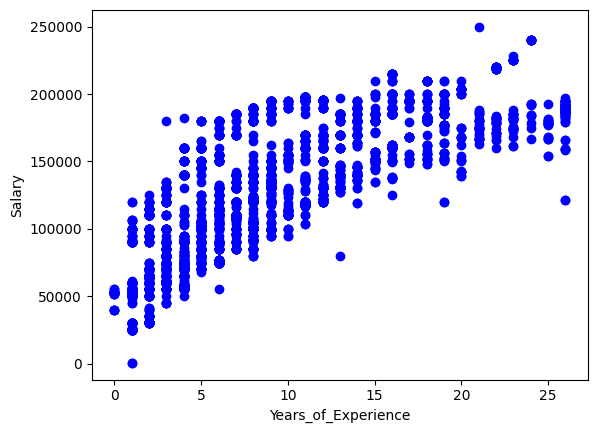

In [36]:
plt.scatter(X, y, color="blue")
plt.xlabel('Years_of_Experience')
plt.ylabel('Salary')
plt.show()

En el gráfico podemos ver que la relación de los años de experiencia y el salario son directamente proporcional y de forma positiva, es decir influyen.

### División de datos (conjuntos de entrenamiento y de prueba)
Dividimos los datos en entrenamiento y prueba mediante la instrucción train_test_split. Para la separación de los datos, vamos a tomar un 20% de los mismos para utilizarlos como prueba una vez que hayamos obtenido el modelo

In [37]:
# Dividimos los datos de en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Dividimos los datos de entrenamiento en desarrollo y validación
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

Veamos las dimensiones del conjunto de datos de entrenamiento

In [38]:
X_train.shape

(2724, 1)

In [39]:
X_test.shape

(909, 1)

In [40]:
X_val.shape

(909, 1)

### Creación del modelo de Regresión

In [41]:
# Creación del modelo
lr = LinearRegression()

# Ajuste del modelo al conjunto de datos de entrenamiento
lr.fit(X_train, y_train)

LinearRegression()

### Predicción del conjunto de datos de validación

In [42]:
# revisamos las predicción del conjunto de datos de prueba
y_pred = lr.predict(X_val)


### Validación de resultados

In [43]:
df_res = pd.DataFrame(columns=['Valor Real', 'Valor Predicho'])
df_res['Valor Real'] = y_val
df_res['Valor Predicho'] = y_pred
df_res['Diferencia'] = abs(df_res['Valor Predicho']-df_res['Valor Real'] )
df_res.head()

,Valor Real,Valor Predicho,Diferencia
1640,195000.0,179452.528300,15547.471700
3338,110000.0,115734.458019,5734.458019
4060,110000.0,128478.072075,18478.072075
2093,100000.0,102990.843962,2990.843962
4379,125000.0,147593.493159,22593.493159


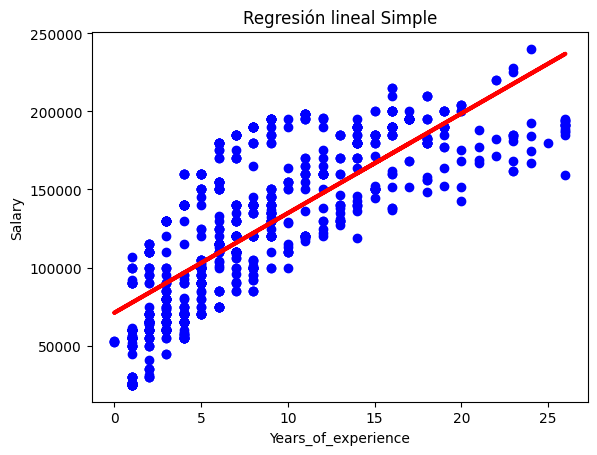

In [44]:
plt.scatter(X_val, y_val, color='blue')
plt.plot(X_val, y_pred, color='red', linewidth=3)
plt.title('Regresión lineal Simple')
plt.xlabel('Years_of_experience')
plt.ylabel('Salary')
plt.show()

In [45]:
print('progresión del salario =', lr.coef_[0], 'Years_of_experience +', lr.intercept_)

progresión del salario = 6371.807028123424 Years_of_experience + 71131.80882175866


Los puntos azules representan el salario real dado unos años de experiencia determinados y  
La línea roja representan los valores predecidos por nuestro modelo.

En la India, los trabajadores de Tech cobran un salario base de 71.131 y por cada año de experiencia se incrementa 6371.80

### Métricas

In [46]:
print('Raiz error cuadrático medio: %.2f' % np.sqrt(mean_squared_error(y_val, y_pred)))
print('Coeficiente de determinación: %.2f' % r2_score(y_val, y_pred))

Raiz error cuadrático medio: 30605.92
Coeficiente de determinación: 0.62


### Predicción de datos futuros

In [47]:
y_pred = lr.predict(X_test)

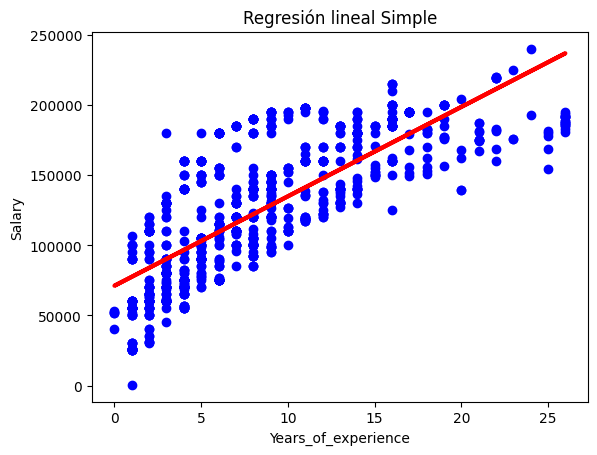

In [48]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=3)
plt.title('Regresión lineal Simple')
plt.xlabel('Years_of_experience')
plt.ylabel('Salary')
plt.show()

In [49]:
print('Raiz error cuadrático medio: %.2f' % np.sqrt(mean_squared_error(y_test, y_pred)))
print('Coeficiente de determinación: %.2f' % r2_score(y_test, y_pred))

Raiz error cuadrático medio: 30609.13
Coeficiente de determinación: 0.60


In [50]:
df_salary

,Age,Gender,Education_Level,Job_Title,Years_of_Experience,Salary
0,32,1,1,16,5,90000.0
1,28,0,2,1,3,65000.0
5,29,1,1,8,2,55000.0
6,42,0,2,12,12,120000.0
8,26,0,1,9,1,45000.0
...,...,...,...,...,...,...
6682,28,1,3,10,4,55000.0
6690,42,1,1,3,13,130000.0
6691,36,0,3,10,9,95000.0
6701,30,0,1,3,4,55000.0


Los resultados nos información sobre el desempeño del modelo de regresión. En este caso, el modelo parece tener una precisión moderada con un coeficiente de determinación del 60% y una medida de dispersión de 30609.13.

Vemos que nuestro modelo tiene un 60% de efectividad al utilizar una sola variable. No obstante, vamos a probar con más modelos para buscar un aumento en la efectividad.

Un RMSE de 30609.13  es elevado, lo que sugiere que hay una cantidad considerable de error en las predicciones.  
El coeficiente de determinación que el modelo explica el 60% de la variación en los datos de los salarios. Todavía hay un 40% de la variación en los salarios que no puede ser explicada.  
Es probable que las variables "Age", "Education_Level", "Gender", y "Job_Title" también influyan en el salario de una persona.  
Vamos a usar modelos de regresión múltiple que incluya más variables para tratar de explicar más de la variación y reducir el error en las predicciones.

## Regresión múltiple con dos variables ('Age' y 'Years_of_Experience')

Al tener una precisión MODERADA Vamos a probar regresión múltiple con dos variables: 'Age' y 'Years_of_Experience'

In [51]:
#Seleccionamos la variable predictora
X = df_salary[['Years_of_Experience','Age']]
#Seleccionamos la variable predicha
y = df_salary['Salary']

In [52]:
X

,Years_of_Experience,Age
0,5,32
1,3,28
5,2,29
6,12,42
8,1,26
...,...,...
6682,4,28
6690,13,42
6691,9,36
6701,4,30


In [53]:
y

0        90000.0
1        65000.0
5        55000.0
6       120000.0
8        45000.0
          ...   
6682     55000.0
6690    130000.0
6691     95000.0
6701     55000.0
6702    140000.0
Name: Salary, Length: 4542, dtype: float64

In [54]:
fig = px.scatter_3d(df_salary, x='Years_of_Experience', y='Salary', z='Age',
                    title="3D Scatter Plot")
fig.update_layout(
    autosize=False,
    width=1000,
    height=800,)

fig.show()

### División de datos (conjuntos de entrenamiento y de prueba)
Dividimos los datos en entrenamiento y prueba mediante la instrucción train_test_split. Para la separación de los datos, vamos a tomar un 20% de los mismos para utilizarlos como prueba una vez que hayamos obtenido el modelo

In [55]:
# Dividimos los datos de en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Dividimos los datos de entrenamiento en desarrollo y validación
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

veamos las dimensiones del conjunto de datos de entrenamiento

In [56]:
X_train.shape

(2724, 2)

In [57]:
X_test.shape

(909, 2)

In [58]:
X_val.shape

(909, 2)

### Creación del modelo de Regresión

In [59]:
# Creación del modelo
lr = LinearRegression()

# Ajuste del modelo al conjunto de datos de entrenamiento
lr.fit(X_train, y_train)

LinearRegression()

### Predicción del conjunto de datos de validación

In [60]:
y_pred = lr.predict(X_val)

### Validacion de resultados

In [61]:
df_res = pd.DataFrame(columns=['Valor Real', 'Valor Predicho'])
df_res['Valor Real'] = y_val
df_res['Valor Predicho'] = y_pred
df_res['Diferencia'] = abs(df_res['Valor Predicho']-df_res['Valor Real'] )
df_res.head()

,Valor Real,Valor Predicho,Diferencia
1640,195000.0,169682.355393,25317.644607
3338,110000.0,115914.788171,5914.788171
4060,110000.0,126887.681688,16887.681688
2093,100000.0,102748.093932,2748.093932
4379,125000.0,148831.523769,23831.523769


In [62]:
print('progresión del salario =', lr.coef_[0], 'Years_of_Experience +',lr.coef_[1], 'Age +', lr.intercept_)

progresión del salario = 7680.247480905887 Years_of_Experience + -1096.9003613167804 Age + 97253.86736727759


### Métricas

In [63]:
print('Raiz error cuadrático medio: %.2f' % np.sqrt(mean_squared_error(y_val, y_pred)))
print('Coeficiente de determinación: %.2f' % r2_score(y_val, y_pred))

Raiz error cuadrático medio: 30415.19
Coeficiente de determinación: 0.63


### Predicción de datos futuros

In [64]:
y_pred = lr.predict(X_test)

In [65]:
print('Raiz error cuadrático medio: %.2f' % np.sqrt(mean_squared_error(y_test, y_pred)))
print('Coeficiente de determinación: %.2f' % r2_score(y_test, y_pred))

Raiz error cuadrático medio: 30458.77
Coeficiente de determinación: 0.60


En este nuevo modelo podemos ver que el resultado no varía mucho, En este caso, el modelo continúa con precisión moderada del 60% y una medida de dispersion de 30458.77. Quiere decir que las variables si se correlacionan positivamente , pero sigamos probando con otras dos mas.

A la vista del error cuadrático medio, observamos una ligera mejora en comparación con el RMSE del modelo anterior de $30,609.13, pero sigue siendo una cantidad considerable de error en las predicciones.

El modelo aún explica el 60% de la variación en los datos de los salarios. Esto no ha cambiado con respecto al modelo anterior, lo que indica que añadir "Age" como variable independiente no ha aumentado significativamente la cantidad de variación que el modelo puede explicar.

Sugiere puede no estar fuertemente correlacionada con "Salary", o que cualquier correlación que exista ya está en gran medida capturada por la variable "Years_of_Experience".

En este punto, podrías considerar agregar otras variables independientes al modelo que podrían tener una correlación más fuerte con "Salary", como "Education_Level"

## Regresión múltiple con dos variables ('Years_of_Experience','Education_Level')

Vamos a probar nuevamente la  regresión múltple de dos variables, pero esta vez son diferentes:  'Age' y 'Years_of_Experience'

In [66]:
#Seleccionamos la variable predictora
X = df_salary[['Years_of_Experience','Education_Level']]
#Seleccionamos la variable predicha
y = df_salary['Salary']

In [67]:
X

,Years_of_Experience,Education_Level
0,5,1
1,3,2
5,2,1
6,12,2
8,1,1
...,...,...
6682,4,3
6690,13,1
6691,9,3
6701,4,1


In [68]:
y

0        90000.0
1        65000.0
5        55000.0
6       120000.0
8        45000.0
          ...   
6682     55000.0
6690    130000.0
6691     95000.0
6701     55000.0
6702    140000.0
Name: Salary, Length: 4542, dtype: float64

In [69]:
fig = px.scatter_3d(df_salary, x='Years_of_Experience', y='Salary', z='Education_Level',
                    title="3D Scatter Plot")
fig.update_layout(
    autosize=False,
    width=1000,
    height=800,)

fig.show()

### División de datos (conjuntos de entrenamiento y de prueba)
Dividimos los datos en entrenamiento y prueba mediante la instrucción train_test_split. Para la separación de los datos, vamos a tomar un 20% de los mismos para utilizarlos como prueba una vez que hayamos obtenido el modelo

In [70]:
# Dividimos los datos de en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Dividimos los datos de entrenamiento en desarrollo y validación
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

veamos las dimensiones del conjunto de datos de entrenamiento

In [71]:
X_train.shape

(2724, 2)

In [72]:
X_test.shape

(909, 2)

In [73]:
X_val.shape

(909, 2)

### Creación del modelo de Regresión

In [74]:
# Creación del modelo
lr = LinearRegression()

# Ajuste del modelo al conjunto de datos de entrenamiento
lr.fit(X_train, y_train)

LinearRegression()

### Predicción del conjunto de datos de validación

In [75]:
y_pred = lr.predict(X_val)

### Validación de resultados

In [76]:
df_res = pd.DataFrame(columns=['Valor Real', 'Valor Predicho'])
df_res['Valor Real'] = y_val
df_res['Valor Predicho'] = y_pred
df_res['Diferencia'] = abs(df_res['Valor Predicho']-df_res['Valor Real'] )
df_res.head()

,Valor Real,Valor Predicho,Diferencia
1640,195000.0,188669.480442,6330.519558
3338,110000.0,121840.248962,11840.248962
4060,110000.0,119638.568913,9638.568913
2093,100000.0,98096.051769,1903.948231
4379,125000.0,148768.395392,23768.395392


In [77]:
print('progresión del salario =', lr.coef_[0], 'Years_of_Experience +',lr.coef_[1], 'Education_Level +', lr.intercept_)

progresión del salario = 5385.629286008472 Years_of_Experience + 12972.938620489704 Education_Level + 58194.966718827156


### Métricas

In [78]:
print('Raiz error cuadrático medio: %.2f' % np.sqrt(mean_squared_error(y_val, y_pred)))
print('Coeficiente de determinación: %.2f' % r2_score(y_val, y_pred))

Raiz error cuadrático medio: 29192.82
Coeficiente de determinación: 0.66


### Predicción de datos futuros

In [79]:
y_pred = lr.predict(X_test)

In [80]:
print('Raiz error cuadrático medio: %.2f' % np.sqrt(mean_squared_error(y_test, y_pred)))
print('Coeficiente de determinación: %.2f' % r2_score(y_test, y_pred))

Raiz error cuadrático medio: 29512.85
Coeficiente de determinación: 0.62


En este nuevo modelo podemos ver que el resultado ha variado un mínimo, En este caso, el modelo continúa con precisión moderada pero aumentó al 62% y bajo su medida de dispersión a 29512.85  
Quiere decir que las variables si se correlacionan positivamente.

Este es el modelo que menor error cuadrático medio presenta, pero el coeficiente de determinación sólo ha mejorado un 2%. Vamos a probar con un modelo de regresión múltiple

## Regresión múltiple con tres variables

Vamos a probar regresión múltiple con tres variables para ver si aumentamos la precisión: 'Years_of_Experience','Age' y 'Education_Level'

In [81]:
#Seleccionamos la variable predictora
X = df_salary[['Years_of_Experience','Age','Education_Level']]
#Seleccionamos la variable predicha
y = df_salary['Salary']

In [82]:
X

,Years_of_Experience,Age,Education_Level
0,5,32,1
1,3,28,2
5,2,29,1
6,12,42,2
8,1,26,1
...,...,...,...
6682,4,28,3
6690,13,42,1
6691,9,36,3
6701,4,30,1


In [83]:
y

0        90000.0
1        65000.0
5        55000.0
6       120000.0
8        45000.0
          ...   
6682     55000.0
6690    130000.0
6691     95000.0
6701     55000.0
6702    140000.0
Name: Salary, Length: 4542, dtype: float64

### División de datos (conjuntos de entrenamiento y de prueba)
Dividimos los datos en entrenamiento y prueba mediante la instrucción train_test_split. Para la separación de los datos, vamos a tomar un 20% de los mismos para utilizarlos como prueba una vez que hayamos obtenido el modelo

In [84]:
# Dividimos los datos de en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Dividimos los datos de entrenamiento en desarrollo y validación
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

Veamos las dimensiones del conjunto de datos de entrenamiento

In [85]:
X_train.shape

(2724, 3)

In [86]:
X_test.shape

(909, 3)

In [87]:
X_val.shape

(909, 3)

### Creación del modelo de Regresión

In [88]:
# Creación del modelo
lr = LinearRegression()

# Ajuste del modelo al conjunto de datos de entrenamiento
lr.fit(X_train, y_train)

LinearRegression()

### Predicción del conjunto de datos de validación

In [89]:
y_pred = lr.predict(X_val)

### Validación de resultados

In [90]:
df_res = pd.DataFrame(columns=['Valor Real', 'Valor Predicho'])
df_res['Valor Real'] = y_val
df_res['Valor Predicho'] = y_pred
df_res['Diferencia'] = abs(df_res['Valor Predicho']-df_res['Valor Real'] )
df_res.head()

,Valor Real,Valor Predicho,Diferencia
1640,195000.0,172237.619132,22762.380868
3338,110000.0,122925.471212,12925.471212
4060,110000.0,115675.513715,5675.513715
2093,100000.0,97049.394827,2950.605173
4379,125000.0,151142.464907,26142.464907


In [91]:
print('progresión del salario =', lr.coef_[0], 'Years_of_Experience +',lr.coef_[1], 'Age +', lr.coef_[2], 'Education_Level +', lr.intercept_)

progresión del salario = 7617.136773435293 Years_of_Experience + -1973.738034304606 Age + 14589.278906156467 Education_Level + 103586.57308314556


### Métricas

In [92]:
print('Raiz error cuadrático medio: %.2f' % np.sqrt(mean_squared_error(y_val, y_pred)))
print('Coeficiente de determinación: %.2f' % r2_score(y_val, y_pred))

Raiz error cuadrático medio: 28628.27
Coeficiente de determinación: 0.67


### Predicción de datos futuros

In [93]:
y_pred = lr.predict(X_test)

In [94]:
print('Raiz error cuadrático medio: %.2f' % np.sqrt(mean_squared_error(y_test, y_pred)))
print('Coeficiente de determinación: %.2f' % r2_score(y_test, y_pred))

Raiz error cuadrático medio: 29105.77
Coeficiente de determinación: 0.64


En este nuevo modelo podemos ver que el resultado ha mejorado en cuanto a dispersión. En este caso, el modelo continúa con precisión moderada  al 64% y bajo un poco mas su medida de dispersion hasta 29105.77. Es decir, este modelo tiene un menor número de variabilidad de los errores.

En resumen, este nuevo modelo con "Age", "Education_level" y "Years_of_Experience" como variables independientes es un modelo mejor que los anteriores basados en las métricas de raíz del error cuadrático medio y coeficiente de determinación.  
Sin embargo, como el coeficiente de determinación es todavía 0.64, hay un 36% de la variación en los salarios que aún no se explica con este modelo.  
Vamos a ver que ocurre con modelos de árboles de decisión, porque puede que haya relaciones no lineales

# MODELO ÁRBOL DE DECISIÓN

## Exploración de datos

Para este modelo vamos a seleccionar las variables 'Years_of_Experience' y 'Salary'.

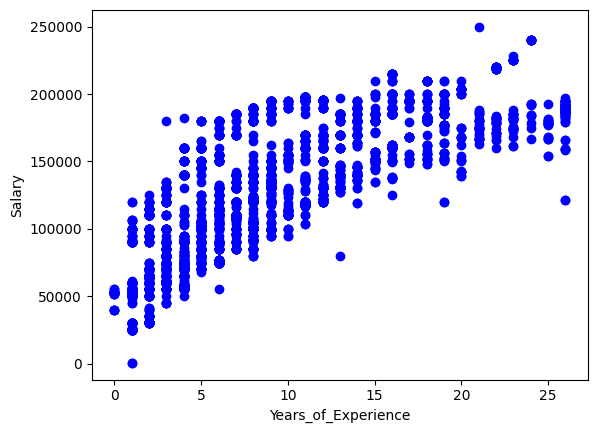

In [95]:
# Visualizamos los datos correspondientes
plt.scatter(df_salary['Years_of_Experience'], df_salary['Salary'], color="blue")
plt.xlabel('Years_of_Experience')
plt.ylabel('Salary')
plt.show()

En el gráfico podemos ver que la relación de los años de experiencia y el salario son directamente proporcional y de forma positiva, es decir influyen los años en el salario.

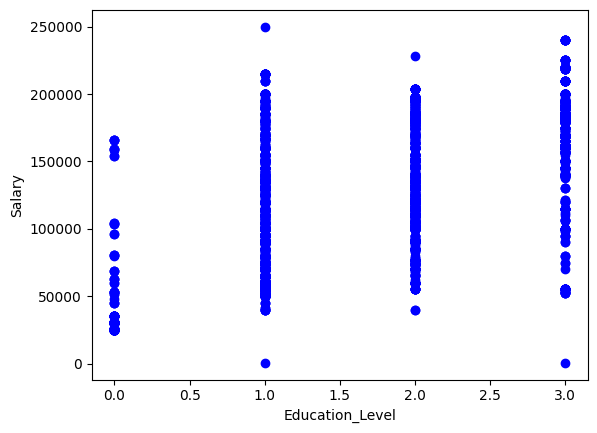

In [96]:
# Visualizamos los datos correspondientes
plt.scatter(df_salary['Education_Level'], df_salary['Salary'], color="blue")
plt.xlabel('Education_Level')
plt.ylabel('Salary')
plt.show()

En el gráfico podemos ver que la relación de el nivel educativo con el salario no se correlacionan demasiado, es decir una persona con un master en Tech, no necesariamente va a tener un sueldo alto, hay otras variables que evaluar.  
No obstante, a la vista de los modelos anteriores, hemos visto que la varianza de "Age" ya está explicada por "Years_of_Experience", puesto que se correlacionan entre sí.  
Las otras variables ("Gender" y "Job Title"), como hemos visto en la matriz de correlación, no parecen tener un peso significativo en el salario, así que "Education_level" parece ser la única opción que queda.

## Preprocesamiento de datos

### Selección de datos

In [97]:
# Seleccionamos las características a tener en cuenta para crear el modelo
X = df_salary[['Years_of_Experience','Education_Level']]

In [98]:
# Defino los datos correspondientes a las etiquetas
y = df_salary['Salary']

### División de datos (conjuntos de entrenamiento y de prueba)
Dividimos los datos en entrenamiento y prueba mediante la instrucción train_test_split.
Para la separación de los datos, vamos a tomar un 20% de los mismos para utilizarlos como prueba una vez que hayamos obtenido el modelo.

In [99]:
# Dividimos los datos de "entrenamiento" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Creación del modelo de Regresión

In [100]:
# Creación del modelo
reg = DecisionTreeRegressor(random_state=0, max_depth=3)

# Ajuste del modelo al conjunto de datos de entrenamiento
reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=0)

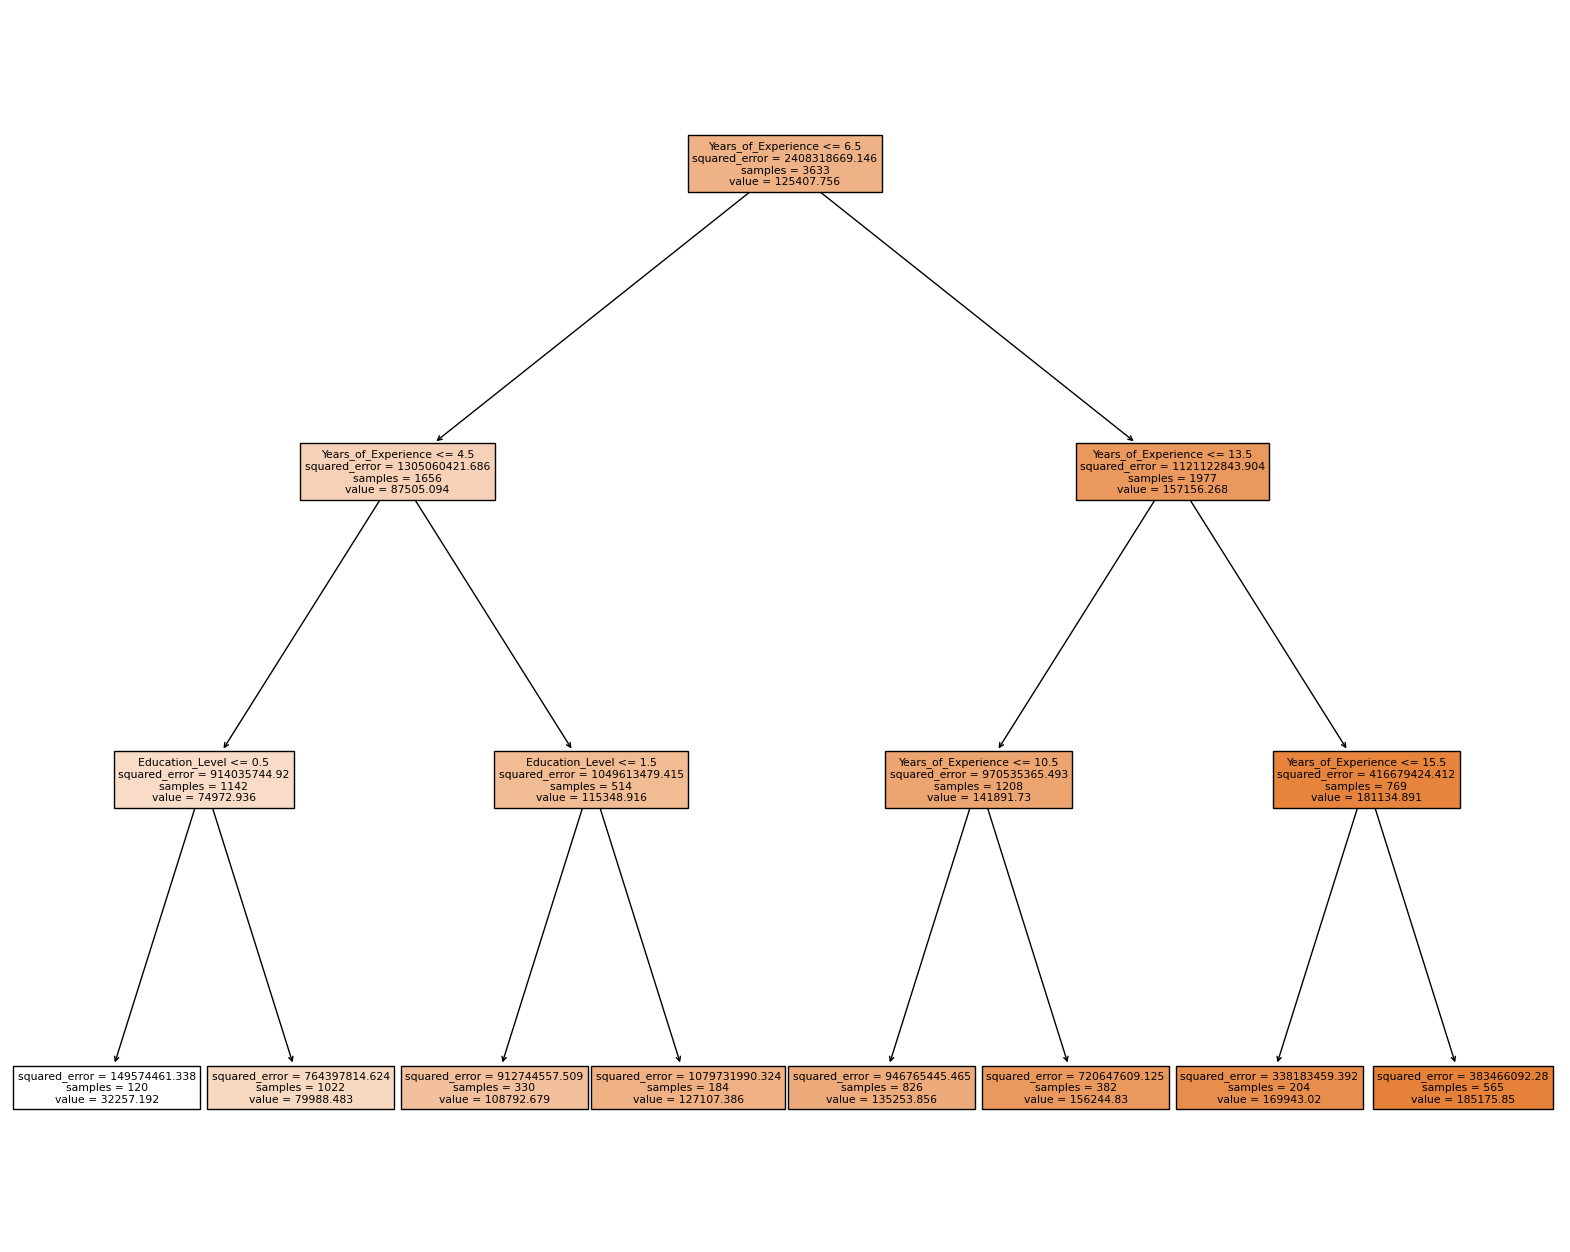

In [101]:
fig = plt.figure(figsize=(20,16))
_ = tree.plot_tree(reg,
                   feature_names=X.columns,
                   filled=True)

## Predicción del conjunto de datos de prueba

In [102]:
# Predicción del conjunto de datos de prueba
y_pred = reg.predict(X_test)

## Validación de resultados

In [103]:
df_resultados =  pd.DataFrame(columns=['Valor Real', 'Valor Predicho'])
df_resultados['Valor Real'] = y_test
df_resultados['Valor Predicho'] = y_pred
df_resultados.head()

,Valor Real,Valor Predicho
3696,65000.0,79988.483366
2969,155795.0,185175.849558
4182,225000.0,185175.849558
2820,195270.0,185175.849558
2494,119836.0,79988.483366


## Métricas

In [104]:
print("Raíz error cuadrático medio: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))
print("Coeficiente de determinación: %.2f" % r2_score(y_test, y_pred))

Raíz error cuadrático medio: 27747.84
Coeficiente de determinación: 0.69


Podemos ver que este modelo es mucho más acertado que la regresión múltiple , ya que aumenta la precisión a un 69%  y la dispersión es mucho menor.

En el modelo de regresión múltiple con 3 variables, habíamos logrado un 64% de efectividad y 29105.77 de dispersión. Es decir que con este modelo, hemos mejorado nuestra precisión en un 5%

Comparado con el error cuadrático medio anterior de $29105.77, las predicciones han mejorado.
Según el coeficiente de determinación. modelo ahora explica el 69% de la variación en los salarios. Esto es una mejora con respecto al valor anterior de 0.64.  
Estos resultados sugieren que el modelo de árbol de decisión es una mejor elección para los datos que el modelo de regresión lineal.

# MODELO CLUSTERING

Normalizamos, para evitar que haya sesgo

In [105]:
mmx = MinMaxScaler()
df_salary_mmx = mmx.fit_transform(df_salary)

In [106]:
df_salary_normalizado = pd.DataFrame(df_salary_mmx, columns=df_salary.columns, index=df_salary.index)

### Selección de la mejor k (número de clusters/grupos)

c:\Users\super\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\super\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\super\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\super\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

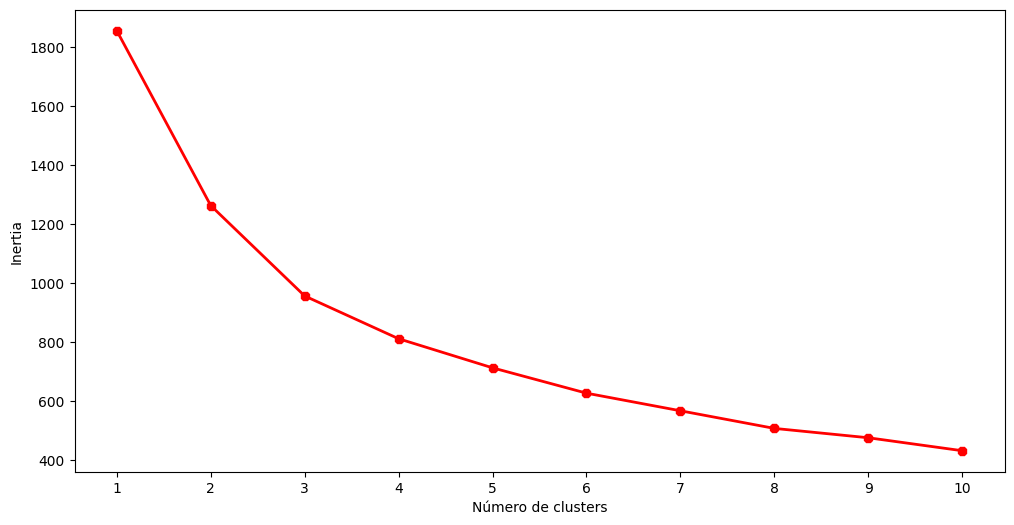

In [107]:
inertias = []
for k in range (1,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_salary_normalizado[df_salary_normalizado.columns])
    inertias.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.plot(range(1,11),inertias,linewidth=2,color='red',marker='8')
plt.xlabel('Número de clusters')
plt.xticks(range(1,11))
plt.ylabel('Inertia')
plt.show()

El valor óptimo de K podríamos decir que es 4.

### Creación del modelo

In [108]:
km = KMeans(n_clusters=4)
clusters = km.fit_predict(df_salary_normalizado[df_salary_normalizado.columns])
df_salary_normalizado["label"] = clusters

c:\Users\super\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [109]:
df_salary['label'] = df_salary_normalizado["label"]

## Visualización de los clusters

In [110]:
fig = px.scatter_3d(df_salary, x='Years_of_Experience', y='Salary', z='Education_Level',
                    color='label',
                    title="3D Scatter Plot")
fig.update_layout(
    autosize=False,
    width=1500,
    height=1300,)

fig.show()

- Naranjas: Menor nivel de educación, suelen tener menos años de experiencia y estudios no superiores a Bachelor o grado universitario
- Morados: Mayor nivel de educación, han estudiado en su mayoría bachelor o grado universitario
- Azules: Mayor nivel de educación, han estudiado hasta un master y tienen más salario
- Amarillos: Tienen un salario más alto y han estudiado Bachelor, algunos también un master y otros incluso doctorado. Aquí el nivel de educación es más indiferente y pesan más los años de experiencia. No obstante, eso sí, el mayor número de doctorados se encuentra en este grupo.

# CONCLUSIÓN

Despues de aplicar el método de árboles de decisión pudimos ver que teniamos una predicción mucho mas efectiva que una regresión y esto sería porque hay una interacción mas compleja entre variables.

Al aplicar clustering, nos hemos dado cuenta que es útil cuando se busca explorar, resumir y agrupar datos sin tener una variable objetivo específica y nos ayudar a descubrir estructuras y patrones ocultos en los datos sin la necesidad de una variable objetivo conocida

A través de este estudio, nos damos cuenta que la variable más importante para determinar el salario son los años de experiencia.